# Compare the average departure delay of SFO, LAX per month in one year depending on the record in 2011-2017
- SFO: San Francisco International Airport
- LAX: Los Angeles International Airport

In [196]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mlp
import numpy as np
import os
import warnings

warnings.filterwarnings('ignore')
%matplotlib notebook

In [5]:
filenames = os.listdir('data')

In [54]:
AllDf = pd.DataFrame()
for filename in filenames:
    df = pd.read_html('data\\' + filename)
    df = pd.DataFrame(df[0])
    df.columns = df.iloc[1, :]
    df.drop([0, 1], axis=0, inplace=True)
    df.drop(df.columns[[1, 3, 4, 5, 6, 7]], axis=1, inplace=True)
    df.set_index(['Departure', 'ScheduledDepartureDate'], inplace=True)
    AllDf = pd.concat((AllDf, df))
    print('{} done!'.format(filename))

APM-Report-1088.xls done!
APM-Report-11100.xls done!
APM-Report-11688.xls done!
APM-Report-12776.xls done!
APM-Report-13119.xls done!
APM-Report-13412.xls done!
APM-Report-1380.xls done!
APM-Report-15953.xls done!
APM-Report-17539.xls done!
APM-Report-18050.xls done!
APM-Report-20034.xls done!
APM-Report-20928.xls done!
APM-Report-22319.xls done!
APM-Report-24215.xls done!
APM-Report-2620.xls done!
APM-Report-2819.xls done!
APM-Report-28947.xls done!
APM-Report-29219.xls done!
APM-Report-29514.xls done!
APM-Report-29527.xls done!
APM-Report-30376.xls done!
APM-Report-30419.xls done!
APM-Report-32601.xls done!
APM-Report-3416.xls done!
APM-Report-36205.xls done!
APM-Report-37752.xls done!
APM-Report-3835.xls done!
APM-Report-40115.xls done!
APM-Report-40380.xls done!
APM-Report-40648.xls done!
APM-Report-41152.xls done!
APM-Report-41840.xls done!
APM-Report-42489.xls done!
APM-Report-43371.xls done!
APM-Report-443.xls done!
APM-Report-44533.xls done!
APM-Report-45017.xls done!
APM-Repor

In [137]:
LAX = AllDf.loc['LAX']
SFO = AllDf.loc['SFO']
for df in [LAX, SFO]:
    df.sort_index(inplace=True)
    df.drop(['02/29/2012', '02/29/2016'], inplace=True, axis=0)
    dates = list(df.index.astype('str'))
    dates = list(map(lambda x: '-'.join(x.split('/')[0:2]), dates))
    df.index = dates
    df.index = df.index.to_datetime().month

In [142]:
LAX = LAX.astype('float')
SFO = SFO.astype('float')

In [143]:
LAX = LAX.groupby(level=0)
SFO = SFO.groupby(level=0)

In [144]:
LAX = LAX.mean()
SFO = SFO.mean()

In [164]:
LAX

1,GateDepartureDelayFlightPlan,TaxiOutDelay,AirportDepartureDelayFlightPlan,AirborneDelay,GateArrivalFlightPlan,TaxiInDelay
1,8.161534,3.185745,10.515662,2.248739,9.648527,2.823626
2,8.917730,2.676738,10.840032,2.127660,9.847281,2.615650
3,10.314822,3.114074,12.669389,2.467538,11.951681,2.518538
4,8.397505,2.863536,10.480279,2.176550,9.833781,2.435189
5,10.756979,3.768801,13.820639,2.415183,12.654793,2.540962
6,11.171152,4.059205,14.573315,2.739688,12.651786,2.728446
7,11.222168,4.486366,14.965400,2.515965,12.877868,2.838764
8,10.559351,5.326658,14.949473,2.514944,11.847566,2.848989
9,6.418447,4.794607,9.823606,2.095883,7.915842,2.355941
10,7.416222,4.636507,10.804519,2.053186,9.030972,2.389414


In [165]:
SFO

1,GateDepartureDelayFlightPlan,TaxiOutDelay,AirportDepartureDelayFlightPlan,AirborneDelay,GateArrivalFlightPlan,TaxiInDelay
1,6.768820,3.934346,9.545059,1.791968,7.522703,2.775200
2,6.816086,3.798063,9.591541,1.720566,7.156231,2.676417
3,8.257250,4.037224,11.494963,1.668159,8.939860,2.584105
4,7.321468,3.903309,10.294295,1.640931,8.244761,2.473318
5,8.363326,4.504968,11.972504,1.805632,9.925002,2.713748
6,8.771538,4.843911,12.335708,1.746883,10.009281,3.007987
7,8.479536,4.802707,11.919323,1.753260,9.749728,3.050181
8,8.896204,5.140685,12.730172,1.586565,10.095361,2.825399
9,5.562861,4.688573,8.740566,1.534078,7.094051,2.385262
10,6.396605,4.804727,9.707868,1.442558,7.580981,2.498124


In [172]:
dateIndex2015 = pd.date_range(start='2015-01-01', end='2015-12-31', freq=pd.offsets.MonthBegin())
labels = list(dateIndex2015.strftime('%b'))
labels

['Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec']

In [181]:
SFO_vals = list(SFO.sum(axis=1))
LAX_vals = list(LAX.sum(axis=1))

[32.338094767039266,
 31.758904597837464,
 36.98156100539329,
 33.878080818209135,
 39.28518062008139,
 40.71530889659735,
 39.754735603042775,
 41.27438535130162,
 30.005390835578886,
 32.43086373440811,
 28.946644042231814,
 37.85823663773445]

<IPython.core.display.Javascript object>


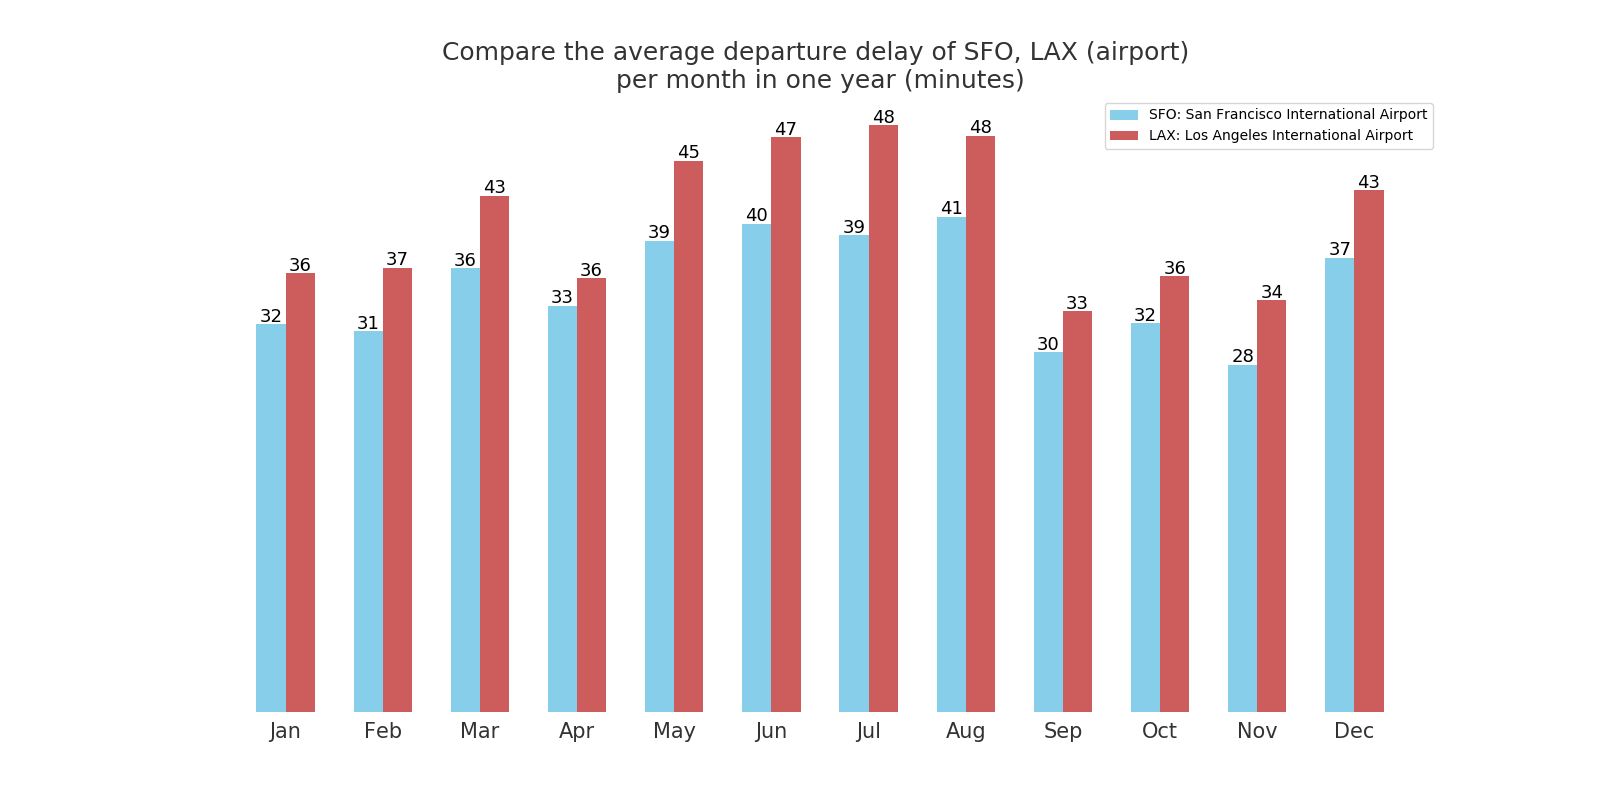

In [225]:
plt.figure(figsize=(16,8))

pos = np.arange(1, 13)
width = 0.3
SFObars = plt.bar(pos-width/2, SFO_vals, width, align='center', linewidth=10, color='SkyBlue')
LAXbars = plt.bar(pos+width/2, LAX_vals, width, align='center', linewidth=10, color='IndianRed')

for i, spine in enumerate(plt.gca().spines.values()):
    spine.set_visible(False)
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')
plt.title('Compare the average departure delay of SFO, LAX (airport) \nper month in one year (minutes)', alpha=0.8, size=18)
plt.legend(['SFO: San Francisco International Airport', 'LAX: Los Angeles International Airport'])

plt.xticks(pos, labels, alpha=0.8, size=15)

for bars in [SFObars, LAXbars]:
    for bar in bars:
        height = bar.get_height()
        plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height()+0.2, str(int(height)), 
                     ha='center', color='k', fontsize=13)
# x = plt.gca().xaxis
# for item in x.get_ticklabels():
#     item.set_rotation(-45)
# plt.subplots_adjust(bottom=0.2)
plt.savefig('text.jpg')